In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$$
E(X)={(0+b) \over 2}={b \over 2}
$$
$$
E(2\bar{X})=2*E(\bar{X})=2*E({X_1+X_2+X_3+...+X_n \over n})={2 \over n} \sum^{n}_{i=1} E(X_i)= {2 \over n}*n {b \over 2}=b
$$

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

In [52]:
stuffs=[np.append(means,1/np.mean(stats.expon.rvs(scale=1/5, size=20))) for i in np.arange(10000)]
np.mean(stuffs)

5.27120481328351

Turns out that $ E({1 \over \bar{X}}) \neq \lambda $
<dv>
It is actually $E({1 \over \bar{X}})={n+1 \over n}*\lambda$
<dv>
So as sample size n increases, the expected value of ${1 \over \lambda} $ approaches $\lambda$

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

$\hat{\theta}_{n} $ is the metric for a set of all samples of size n, so for example, it could be the mean for the distribution of the mean of sample sizes of 10.

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

Prove: $ lim_{n ->\infty} Var(\hat{\theta}_n)=0$, so prove the variance of sample means goes to 0 asymtotically as n increases

$$
lim_{n ->\infty} Var(\hat{\theta}_n) = lim_{n ->\infty} Var(\bar{X}_n) = lim_{n ->\infty} {(b-a)^2 \over 12}
$$
$$
=lim_{n ->\infty} {b^2 \over 12} = lim_{n ->\infty} {b^2 \over 12} = lim_{n ->\infty} {(2*\bar{X})^2 \over 12}
$$
$$
= lim_{n ->\infty} {\bar{X}^2 \over 3}= lim_{n ->\infty} {\sum{X_i} \over 3*n}=0
$$

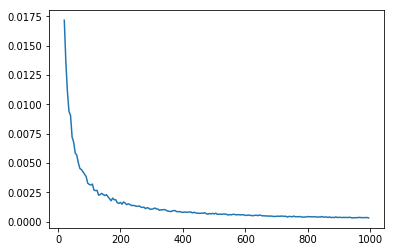

In [68]:
# Finds variance of 1000 2*sample means as n increases, becuase b=2*E(X)
samp_sizes=np.arange(20, 1000, 5)
estimators=[]
for i in samp_sizes:
    samp_size_n_mean=[]
    for j in np.arange(1000):
        samp_size_n_mean.append(2*np.mean(stats.uniform.rvs(size=i)))
    estimators.append(np.var(samp_size_n_mean))
plt.plot(samp_sizes, estimators)
plt.show()

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

Prove: $ lim_{n ->\infty} Var(\hat{\theta}_n)=0$, so prove the variance of sample means goes to 0 asymtotically as n increases

$$
lim_{n ->\infty} Var(\hat{\theta}_n) = lim_{n ->\infty} Var(\bar{X}_n) =lim_{n ->\infty} {\sum (\bar{X}_i-\mu)^2 \over n}=0
$$

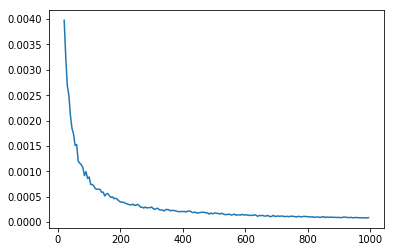

In [69]:
# Finds variance of 1000 sample means as n increases, becuase mu=E(X)
samp_sizes=np.arange(20, 1000, 5)
estimators=[]
for i in samp_sizes:
    samp_size_n_mean=[]
    for j in np.arange(1000):
        samp_size_n_mean.append(np.mean(stats.uniform.rvs(size=i)))
    estimators.append(np.var(samp_size_n_mean))
plt.plot(samp_sizes, estimators)
plt.show()

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

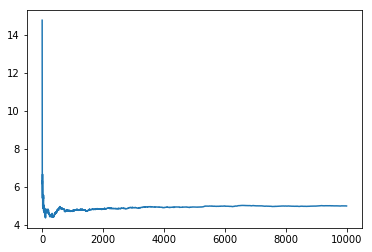

In [70]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()